# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

## Importing Dataset and Data Munging

In [803]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Load the data into a DataFrame
df = pd.read_csv('../Resources/Iowa_Liquor_sales_sample_10pct_train.csv')

### Filling in missing values in County Names

In [804]:
#fixing missing county names
cc = df.set_index('City')['County'].to_frame()
cc.dropna(inplace=True)
undefined = pd.DataFrame([['Wayne'],['Polk'],['Fremont']], columns=['County'], index=['SEYMOUR', 'RUNNELLS', 'TABOR'])
df2 = pd.concat([cc, undefined])

def get_county(city):
    return df2.T[city].values[0][0]


In [805]:
citys_wo_county = df[pd.isnull(df["County"])]["City"].to_frame()
for row in citys_wo_county.index:
    df.set_value(row, 'County', get_county(citys_wo_county.ix[row]['City']))

In [806]:
df['City'].isnull().sum()

0

In [807]:
#fixing spelling errors
df['City'] = df['City'].apply(lambda x: x.replace('MOUNT PLEASANT','MT PLEASANT'))
df['City'] = df['City'].apply(lambda x: x.replace('OTTUWMA','OTTUMWA'))
df['City'] = df['City'].apply(lambda x: x.replace('MOUNT VERNON','MT VERNON'))
df['City'] = df['City'].apply(lambda x: x.replace('ARNOLDS PARK','ARNOLD\'S PARK'))
df['City'] = df['City'].apply(lambda x: x.replace('LEMARS','LE MARS'))
df['City'] = df['City'].apply(lambda x: x.replace('LECLAIRE','LE CLAIRE'))
df['City'] = df['City'].apply(lambda x: x.replace('DEWITT','DE WITT'))
df['City'] = df['City'].apply(lambda x: x.replace('GUTTENBURG','GUTTENBERG'))
df['City'] = df['City'].apply(lambda x: x.replace('JEWELL','JEWELL JUNCTION'))
df['City'] = df['City'].apply(lambda x: x.replace('JEWELL JUNCTION JUNCTION','JEWELL JUNCTION'))
df['City'] = df['City'].apply(lambda x: x.replace('KELLOG','KELLOGG'))
df['City'] = df['City'].apply(lambda x: x.replace('KELLOGGG','KELLOGG'))


In [810]:
df[(df['County']=='W') | (df['County']=='P') | (df['County']=='F')]

,Unnamed: 0,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)


In [809]:
df.ix[2073,'County'] = 'Wayne'
df.ix[5842,'County'] = 'Wayne'
df.ix[70366,'County'] = 'Wayne'
df.ix[72786,'County'] = 'Polk'
df.ix[73473,'County'] = 'Fremont'
df.ix[96871,'County'] = 'Wayne'
df.ix[104910,'County'] = 'Wayne'
df.ix[113314,'County'] = 'Polk'
df.ix[121184,'County'] = 'Polk'
df.ix[136231,'County'] = 'Wayne'
df.ix[139566,'County'] = 'Fremont'
df.ix[188113,'County'] = 'Fremont'

### Filling in missing values in Category Names

In [811]:
#fixing missing categories
cat = df.set_index('Category')['Category Name'].to_frame()
cat.dropna(inplace=True)
undefined_cats = pd.DataFrame([["Moonshine"],["Reposado"],["Vodka"],["Hennessy"],["Spiced Rum"],["Rum"],["Amaretto"],["Spirit"],["Moonshine"],["Moonshine"],["Rum"]], columns=['Category Name'], index=['1011700.0', '1022200.0', '1032100.0', '1052100.0', '1062400.0', '1062500.0', '1082100.0', '1082200.0', '1091100.0', '1091300.0', '1092100.0'])
all_cats = pd.concat([cat, undefined_cats])

def get_category_name(category):
    return all_cats.T[str(float(category))].values[0]

In [812]:
category_wo_name = df[pd.isnull(df["Category Name"])]["Category"].to_frame()

for row in category_wo_name.index:
    if not np.isnan(category_wo_name.ix[row]['Category']):
        df.set_value(row, 'Category Name', get_category_name(category_wo_name.ix[row]['Category']))

In [813]:
del df['County Number']
print df.shape

(243859, 18)


In [817]:
#converting to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [814]:
del df['Category']

In [815]:
#removing $ and converting to float
df['State Bottle Cost'] = df['State Bottle Cost'].apply(lambda x: str(x).replace('$','')).astype(float)
df['State Bottle Retail'] = df['State Bottle Retail'].apply(lambda x: str(x).replace('$','')).astype(float)
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(lambda x: str(x).replace('$','')).astype(float)
df['City'] = df['City'].apply(lambda x: x.upper())

In [818]:
#only using the 2015 year data
df = df[df['Date'].dt.year == 2015]

### Creating Train/Test Split

In [819]:
df_y = df['Sale (Dollars)']
df_X = df.drop(["Sale (Dollars)"], axis=1)

In [820]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.33)

#### Concatenating X_train and Y_train for Analysis

In [821]:
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

In [822]:
#creating total cost column
tot_cost = df['Bottles Sold']*df['State Bottle Cost']
insert_totcost = df.columns.get_loc('Sale (Dollars)') + 1
df.insert(insert_totcost,'Total_Cost',tot_cost)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [730]:
test

,Unnamed: 0,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars)
41923,238611,2015-11-23,2628,ELDORA,50627,Hardin,VODKA 80 PROOF,380,37348,Phillips Vodka,1750,7.60,11.40,6,10.50,2.77,68.40
115623,196094,2015-09-17,3920,CLINTON,52732,Clinton,COFFEE LIQUEURS,370,67524,Kahlua Coffee Liqueur,375,6.49,9.74,1,0.38,0.10,9.74
146445,161501,2015-06-22,4230,CLIVE,50325,Polk,VODKA 80 PROOF,434,36308,Hawkeye Vodka,1750,7.17,10.76,12,21.00,5.55,129.12
36703,193629,2015-10-22,3769,CEDAR FALLS,50613,Black Hawk,VODKA 80 PROOF,255,37886,Seagrams Vodka,750,5.38,8.07,12,9.00,2.38,96.84
73858,195088,2015-11-10,3666,CEDAR RAPIDS,52404,Linn,STRAIGHT BOURBON WHISKIES,65,19486,Maker's 46,750,23.62,35.43,6,4.50,1.19,212.58
12930,53350,2015-01-20,2565,SPENCER,51301,Clay,SCOTCH WHISKIES,260,10009,Scoresby Rare Scotch,1000,6.64,9.96,4,4.00,1.06,39.84
173120,77954,2015-01-20,3676,GREENE,50636,Butler,STRAIGHT BOURBON WHISKIES,259,17127,Cabin Still Str Bourbon,1000,5.00,7.50,3,3.00,0.79,22.50
140508,34546,2015-01-15,4829,DES MOINES,50314,Polk,STRAIGHT BOURBON WHISKIES,65,27544,Red Stag By Jim Beam,750,11.03,16.55,12,9.00,2.38,198.60
95745,267412,2015-03-31,2522,SPIRIT LAKE,51360,Dickinson,AMERICAN COCKTAILS,55,57129,Chi-Chi's Mexican Mudslide,1750,6.50,9.75,6,10.50,2.77,58.50
173872,88910,2015-11-16,3618,CEDAR RAPIDS,52404,Linn,CREAM LIQUEURS,260,68036,Bailey's Original Irish Cream,750,13.49,20.24,12,9.00,2.38,242.88


In [329]:
train.head()

,Unnamed: 0,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars),Total_Cost
2401,208630,2015-01-20,4895,CEDAR RAPIDS,52402,Linn,AMERICAN GRAPE BRANDIES,115,53218,Paul Masson Grande Amber Brandy,1750,12.00,18.00,6,10.5,2.77,108.00,72.00
35048,213743,2015-05-22,3162,MUSCATINE,52761,Muscatine,100 PROOF VODKA,300,36886,Mccormick Vodka,750,3.31,4.97,12,9.0,2.38,59.64,39.72
65597,188624,2015-10-14,4568,SIOUX CITY,51108,Woodbury,CREAM LIQUEURS,305,73051,Rumchata Mini,500,8.87,13.31,6,3.0,0.79,79.86,53.22
240283,129788,2015-10-20,2592,MARSHALLTOWN,50158,Marshall,CANADIAN WHISKIES,115,11774,Black Velvet,375,3.07,4.61,4,1.5,0.40,18.44,12.28
129227,48509,2015-05-13,2505,BOONE,50036,Boone,CANADIAN WHISKIES,55,12404,Canadian Ltd Whisky,375,2.05,3.08,24,9.0,2.38,73.92,49.20


In [554]:
train.describe()

,Unnamed: 0,Store Number,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars),Total_Cost
count,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000,131831.000000
mean,135360.887371,3578.526394,255.713489,45925.667878,926.363860,9.784153,14.694196,9.962255,9.124323,2.410597,130.679780,86.968152
std,78208.695301,942.340233,141.603410,52160.286409,492.742095,7.166963,10.749908,25.234265,30.448640,8.043672,388.087399,257.629855
min,0.000000,2106.000000,10.000000,173.000000,50.000000,0.890000,1.340000,1.000000,0.100000,0.030000,1.340000,0.890000
25%,67726.500000,2603.000000,115.000000,26828.000000,750.000000,5.510000,8.270000,2.000000,1.600000,0.420000,30.500000,20.310000
50%,135064.000000,3713.000000,260.000000,38176.000000,750.000000,8.070000,12.300000,6.000000,5.250000,1.390000,70.560000,47.040000
75%,203086.500000,4349.000000,380.000000,64573.000000,1000.000000,11.920000,17.880000,12.000000,10.500000,2.770000,135.240000,90.120000
max,270954.000000,9013.000000,978.000000,995381.000000,6000.000000,425.000000,637.500000,2508.000000,2508.000000,662.540000,29327.760000,19551.840000


In [288]:
train[train['Bottles Sold'] < 26].describe()

,Unnamed: 0,Store Number,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Sale (Dollars)
count,126622.000000,126622.000000,126622.00000,126622.000000,126622.000000,126622.000000,126622.000000,126622.000000,126622.000000,126622.000000,126622.000000
mean,135396.168810,3574.925819,255.74048,45955.553537,929.859732,9.855281,14.800806,7.208534,6.503885,1.718324,95.044645
std,78218.280152,939.605787,141.86241,51460.384476,490.818711,7.194565,10.791145,5.895200,5.783517,1.527906,93.409132
min,0.000000,2106.000000,10.00000,173.000000,50.000000,0.890000,1.340000,1.000000,0.100000,0.030000,1.340000
25%,67768.250000,2603.000000,115.00000,26828.000000,750.000000,5.705000,8.630000,2.000000,1.500000,0.400000,29.900000
50%,135067.500000,3713.000000,260.00000,38180.000000,750.000000,8.200000,12.300000,6.000000,4.500000,1.190000,67.395000
75%,203145.750000,4346.000000,380.00000,64711.000000,1000.000000,11.960000,17.940000,12.000000,10.500000,2.770000,129.600000
max,270954.000000,9010.000000,978.00000,995381.000000,6000.000000,425.000000,637.500000,25.000000,75.000000,19.810000,2434.560000


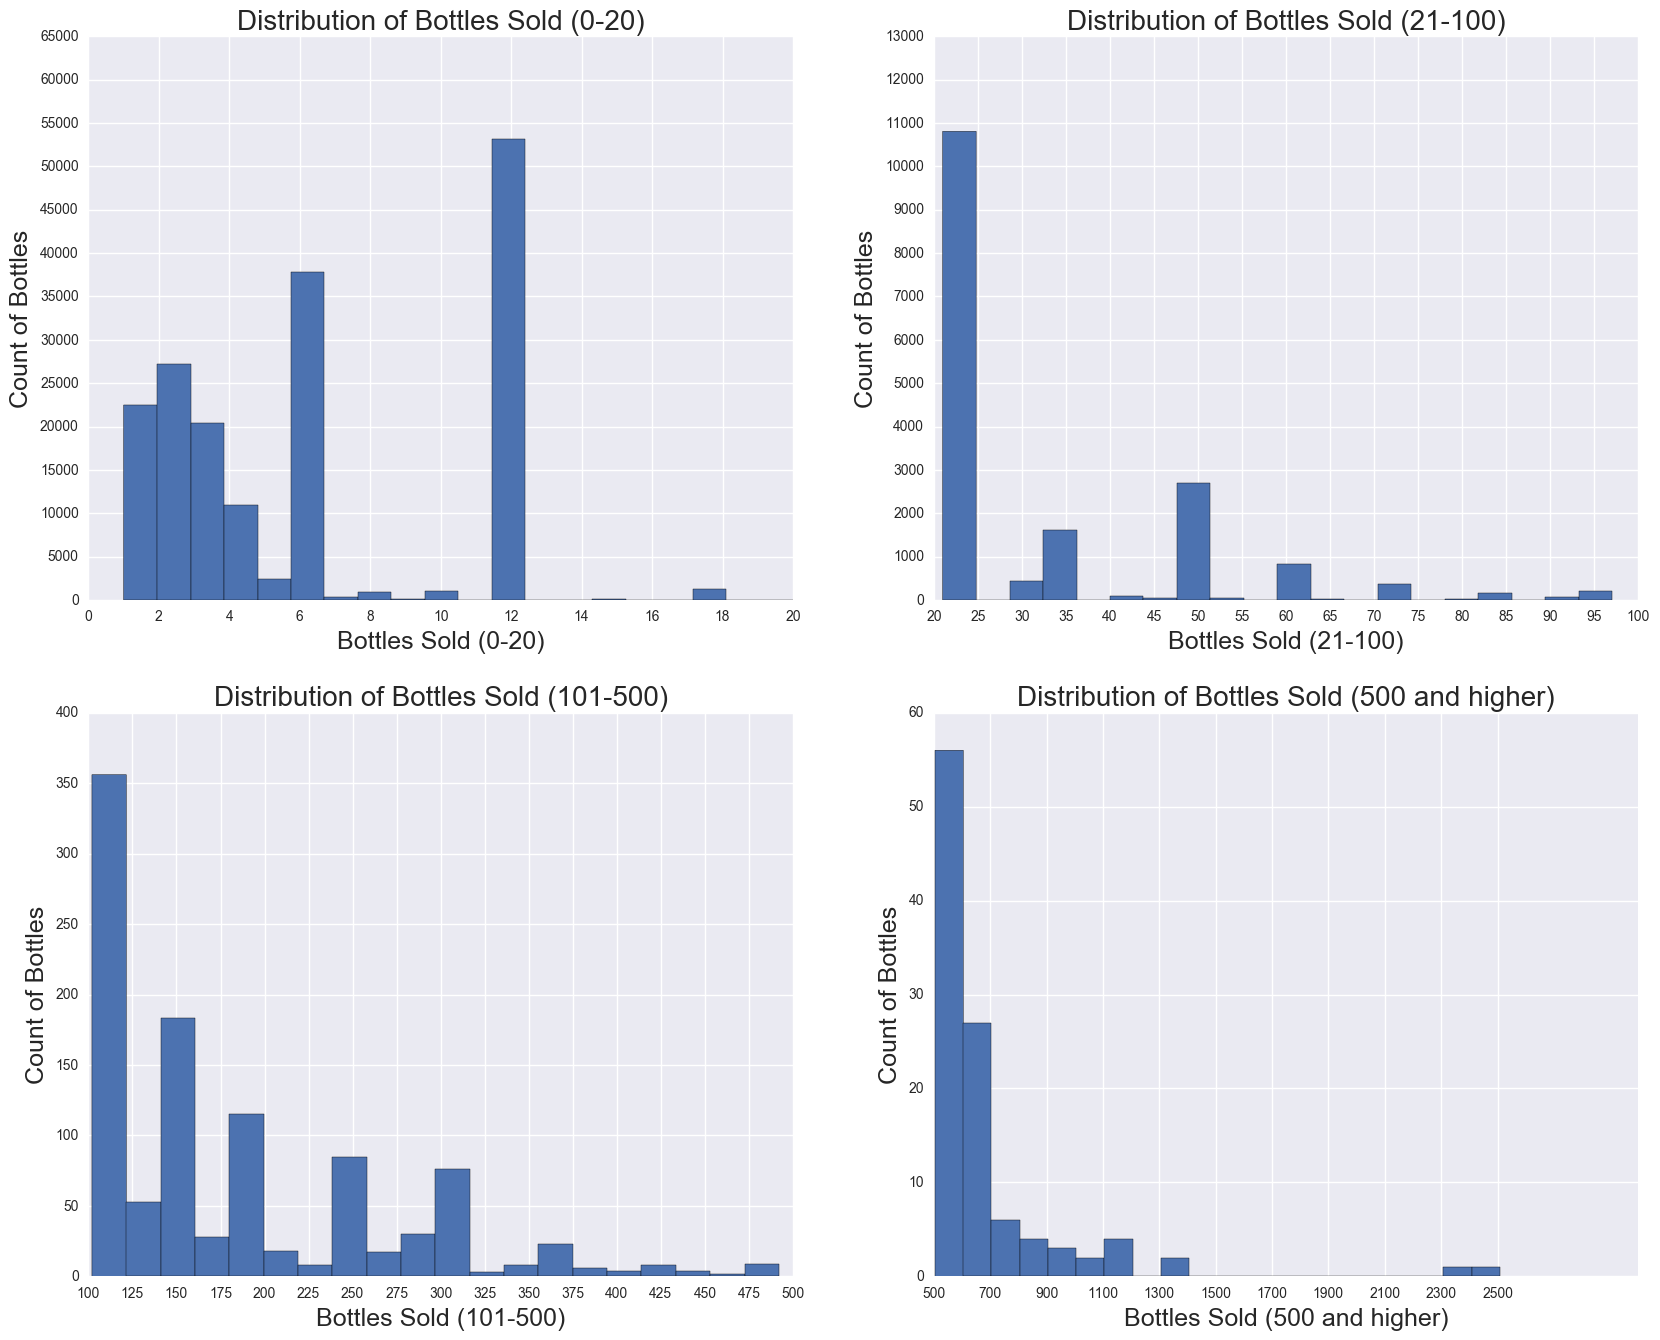

In [754]:
#evaluating bottles sold
fig, axes = plt.subplots(2,2, figsize=(20,16))
#Bottles Sold less than or equal to 10
axes[0][0].hist(x = df[df['Bottles Sold']<=20]['Bottles Sold'],bins = 20) 
axes[0][0].xaxis.set_ticks(np.arange(0, 21, 2))
axes[0][0].yaxis.set_ticks(np.arange(0, 70000, 5000))
axes[0][0].set_title('Distribution of Bottles Sold (0-20)',fontsize = 20)
axes[0][0].set_xlabel('Bottles Sold (0-20)',fontsize = 18)
axes[0][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 10 and less than or equal to 100
axes[0][1].hist(x = df[(df['Bottles Sold']>20) & (df['Bottles Sold']<=100)]['Bottles Sold'],bins = 20)
axes[0][1].xaxis.set_ticks(np.arange(20, 101, 5))
axes[0][1].yaxis.set_ticks(np.arange(0, 14000, 1000))
axes[0][1].set_title('Distribution of Bottles Sold (21-100)',fontsize = 20)
axes[0][1].set_xlabel('Bottles Sold (21-100)',fontsize = 18)
axes[0][1].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 100 and less than or equal to 500
axes[1][0].hist(x = df[(df['Bottles Sold']>100) & (df['Bottles Sold']<=500)]['Bottles Sold'],bins=20)
axes[1][0].xaxis.set_ticks(np.arange(100, 501, 25))
axes[1][0].set_title('Distribution of Bottles Sold (101-500)',fontsize = 20)
axes[1][0].set_xlabel('Bottles Sold (101-500)',fontsize = 18)
axes[1][0].set_ylabel('Count of Bottles',fontsize = 18)
#Bottles Sold more than 500 and less than or equal to 2700
axes[1][1].hist(x = df[(df['Bottles Sold']>500) & (df['Bottles Sold']<=2700)]['Bottles Sold'],bins = 20)
axes[1][1].xaxis.set_ticks(np.arange(500, 2700, 200))
axes[1][1].set_title('Distribution of Bottles Sold (500 and higher)',fontsize = 20)
axes[1][1].set_xlabel('Bottles Sold (500 and higher)',fontsize = 18)
axes[1][1].set_ylabel('Count of Bottles',fontsize = 18);

In [823]:
#make all category names upper case
#create category bins to be used for portfolio
df['Category Name'] = df['Category Name'].apply(lambda x: str(x).upper())
category = df.groupby('Category Name')['Item Number'].nunique().to_frame()
category.reset_index(inplace = True)
#creating category bins 
cat_bins = []
for x in df['Category Name']:
    if 'VODKA' in x:
        cat_bins.append('VODKA')
    elif 'WHISKEY' in x:
        cat_bins.append('WHISKEY')
    elif 'RUM' in x:
        cat_bins.append('RUM')
    elif 'SCHNAPPS' in x:
        cat_bins.append('SCHNAPPS')
    elif 'BRANDIES' in x:
        cat_bins.append('BRANDIES')    
    elif 'GIN' in x:
        cat_bins.append('GIN') 
    elif 'SCOTCH' in x:
        cat_bins.append('SCOTCH') 
    elif 'BOURBON' in x:
        cat_bins.append('BOURBON')
    elif 'AMARETTO' in x:
        cat_bins.append('AMARETTO')         
    elif 'TEQUILA' in x:
        cat_bins.append('TEQUILA') 
    else:
        cat_bins.append('OTHER')
cat_bin_df = pd.DataFrame(cat_bins)
cat_bin_df = cat_bin_df.rename(columns = {0:'Category_Bins'})


(1371, 2)
The mean # of unique items per store is 91.0590809628
The max # of unique items per store is 703
The min # of unique items per store is 1


,Store Number,Unique_Items
0,2106,240
1,2113,84
2,2130,192
3,2152,68
4,2178,171


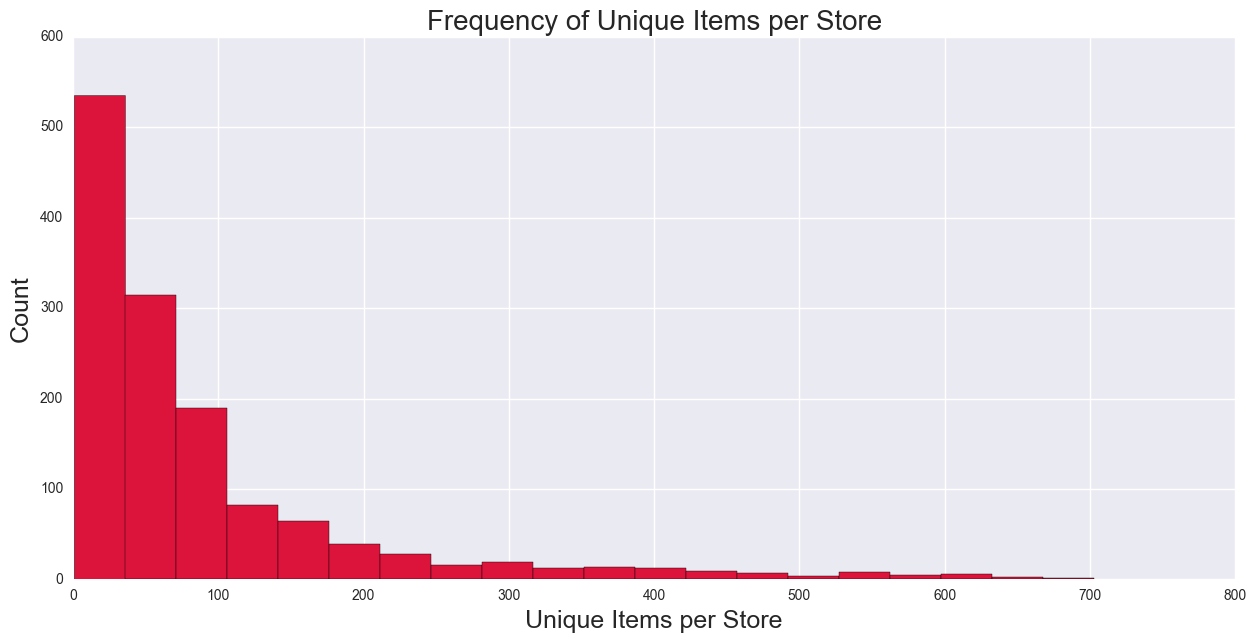

In [825]:
#creating unique items per store - possible proxy for sq footage given more items per store means a bigger store
#assumption is that that if an item did not sell, the business would remove them from the shelves, each business would maximize revenues
unique_items_per_store = df.groupby('Store Number')['Item Number'].nunique().to_frame('Unique_Items')
unique_items_per_store.reset_index(inplace = True)
unique_items_per_store.sort_values('Unique_Items',ascending = False)
print unique_items_per_store.shape
print "The mean # of unique items per store is", unique_items_per_store['Unique_Items'].mean()
print "The max # of unique items per store is", unique_items_per_store['Unique_Items'].max()
print "The min # of unique items per store is", unique_items_per_store['Unique_Items'].min()
unique_items_per_store['Unique_Items'].hist(bins = 20, figsize = (15,7), color = 'crimson')
plt.title('Frequency of Unique Items per Store',fontsize = 20)
plt.xlabel('Unique Items per Store',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
unique_items_per_store.head()

In [826]:
verify = df[df['Bottles Sold'] < 26].groupby('City')['Bottles Sold'].sum().to_frame()
verify.reset_index(inplace = True)
verify = pd.merge(stores_per_city,verify,how='outer')
verify[verify['Bottles Sold'].isnull()]
df[df['City']=='CUMMING']
#CUMMING is the only city that gets removed when we limit to bottles sold < 26 per transaction
#considering there are only two transactions for CUMMING, we are okay with removing fron the analysis

,Unnamed: 0,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Total_Cost,Volume Sold (Liters),Volume Sold (Gallons)
140109,100716,2015-12-01,9013,CUMMING,50061,Warren,BLENDED WHISKIES,154,27629,Prairie Fire,750,9.09,13.64,60,818.40,545.40,45.0,11.89
189956,105091,2015-06-04,9013,CUMMING,50061,Warren,VODKA 80 PROOF,154,36447,Ingenioz,750,12.54,18.81,36,677.16,451.44,27.0,7.13


In [827]:
city_revenue = df[df['Bottles Sold'] < 26].groupby('City')[['Sale (Dollars)','Total_Cost']].sum()
city_revenue['Profit'] = city_revenue['Sale (Dollars)'] - city_revenue['Total_Cost']
city_revenue.reset_index(inplace = True)

In [828]:
#creating stores per zip/city/county and county_df
stores_per_zip = df.groupby('Zip Code')['Store Number'].nunique().to_frame('Stores_per_zip')
stores_per_city = df.groupby('City')['Store Number'].nunique().to_frame('Stores_per_City')
stores_per_city.reset_index(inplace = True)
stores_per_county = df.groupby('County')['Store Number'].nunique().to_frame('Stores_per_County')
stores_per_county.reset_index(inplace = True)

In [829]:
county_store = df.groupby(['County','Store Number'])['Zip Code'].nunique().to_frame('Count')
county_store.reset_index(inplace = True)
county_items = pd.merge(county_store,unique_items_per_store,how= 'outer')
#this is the average unique items per store in the county. 
county_avgitems = county_items.groupby('County')['Unique_Items'].mean().to_frame('Avg_items_store')
county_avgitems.reset_index(inplace = True)
county_avgitems.head()

#creating city-store number pair and average items per store per city
city_store = df.groupby(['City','Store Number'])['Zip Code'].nunique().to_frame('Count')
city_store.reset_index(inplace = True)
city_items = pd.merge(city_store,unique_items_per_store)
city_avgitems = city_items.groupby('City')['Unique_Items'].mean().to_frame('Average_items_store')
city_avgitems.reset_index(inplace = True)
sales_per_store = df[df['Bottles Sold'] < 26].groupby('Store Number')['Sale (Dollars)'].sum().to_frame()
sales_per_store.reset_index(inplace = True)
sales_per_store.head()

,Store Number,Sale (Dollars)
0,2106,72043.34
1,2113,8072.07
2,2130,52986.13
3,2152,6504.77
4,2178,20088.38


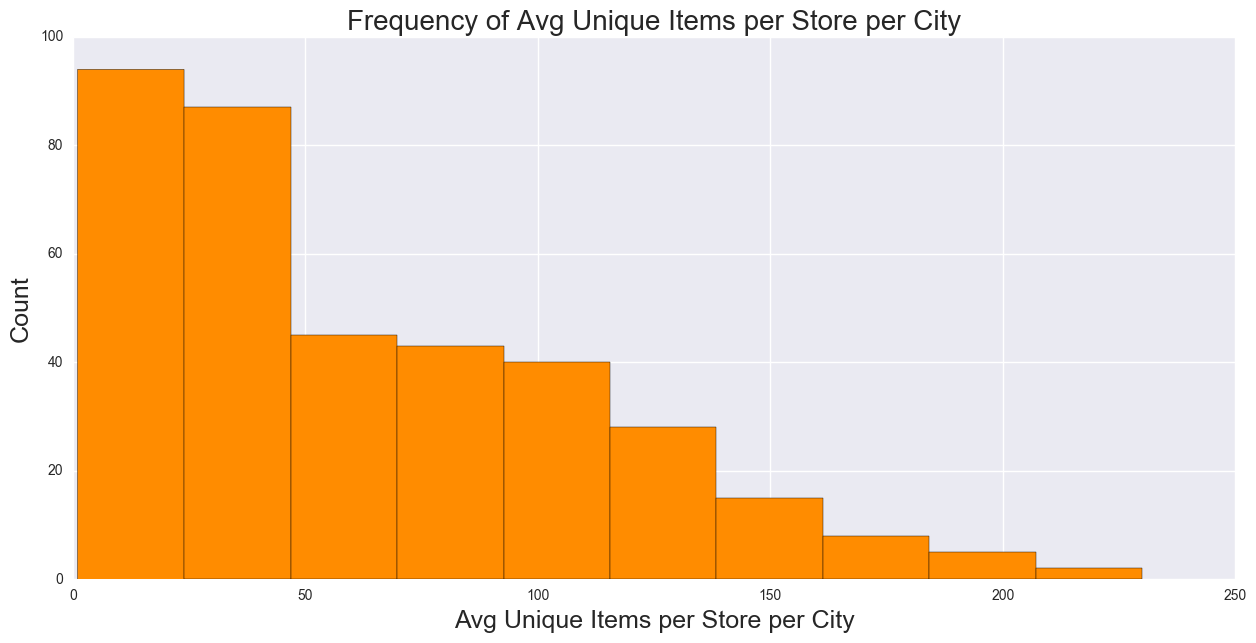

In [830]:
#county_avgitems.hist(figsize = (15,7), color = 'darkorange')
#plt.title('Frequency of Avg Unique Items per Store per County',fontsize = 20)
#plt.xlabel('Avg Unique Items per Store per County',fontsize = 18)
#plt.ylabel('Count',fontsize = 18)

city_avgitems.hist(figsize = (15,7), color = 'darkorange')
plt.title('Frequency of Avg Unique Items per Store per City',fontsize = 20)
plt.xlabel('Avg Unique Items per Store per City',fontsize = 18)
plt.ylabel('Count',fontsize = 18)

In [886]:
#using store number
store_bottles_df = df[df['Bottles Sold'] < 26].groupby(['Store Number','City'])[['Bottles Sold','Sale (Dollars)']].sum()
store_bottles_df.reset_index(inplace = True)
store_bottles_uniq_df = pd.merge(store_bottles_df,unique_items_per_store)
store_df = pd.merge(store_bottles_uniq_df,stores_per_city)
store_df['AvgPrice'] = store_df['Sale (Dollars)'] / store_df['Bottles Sold']
#store_df = pd.merge(store_df,city_metrics,on='City',how='left')
store_df = pd.merge(store_df,city_pop_2015,how='left')
city_sales = store_df.groupby('City')[['Bottles Sold','Sale (Dollars)']].sum()
city_sales.reset_index(inplace = True)
city_sales = city_sales.rename(columns = {'Bottles Sold':'Bottles_City','Sale (Dollars)':'Sales_City'})
store_df = pd.merge(store_df,city_sales)
store_df['Sale_marketshare'] = store_df['Sale (Dollars)'] / store_df['Sales_City']

df_y = store_df.iloc[:,3]
df_X = store_df.iloc[:,[2,4,5,6,7]]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=.33)

In [893]:
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.cross_validation import cross_val_predict,cross_val_score

lr = linear_model.LinearRegression()


lr_model = lr.fit(X_train,y_train)
lr_predict = lr.predict(X_train)
lr_r2 =  r2_score(y_true=y_train, y_pred=lr_predict)
lr_r2
print 'Linear Regression r^2 between Actual y and Predicted y_hat :',lr_r2
print 'Linear Regression Coefficients are:',lr_model.coef_



test_linear_r2 =  r2_score(y_true=y_test, y_pred=lr.predict(X_test))
print 'The r^2 on the test data is:',test_linear_r2
#model fits on test data
df_y_predict = lr.predict(df_X)
# sns.regplot(df_y,lr.predict(df_X))

delta = df_y - df_y_predict
store_df['Delta'] = pd.Series(delta)
store_df.sort_values('Delta',ascending = False)

Linear Regression r^2 between Actual y and Predicted y_hat : 0.982646318114
Linear Regression Coefficients are: [  1.64468193e+01  -2.17876476e+01  -5.35122582e+00   4.30348181e+02
  -5.70524924e-03]
The r^2 on the test data is: 0.970745098651


,Store Number,City,Bottles Sold,Sale (Dollars),Unique_Items,Stores_per_City,AvgPrice,Population,Bottles_City,Sales_City,Sale_marketshare,Delta
77,2633,DES MOINES,15087,263203.53,569,90,17.445717,210330,134265,1749891.08,0.150411,27751.387778
373,3773,CEDAR RAPIDS,7302,131553.07,378,74,18.016033,130405,94196,1193081.11,0.110263,19190.929522
137,4829,DES MOINES,14859,251057.75,529,90,16.896006,210330,134265,1749891.08,0.143471,18720.543832
296,4129,AMES,3309,60997.74,613,25,18.433889,65060,35942,507241.80,0.120254,18613.002783
70,2248,DES MOINES,2884,60343.30,297,90,20.923474,210330,134265,1749891.08,0.034484,18168.807233
467,2648,WEST DES MOINES,6920,115619.79,624,30,16.708062,64113,37282,536598.59,0.215468,14849.312203
753,3952,BETTENDORF,8105,139704.78,281,12,17.236864,35505,20650,311104.89,0.449060,11484.551563
988,5102,MT VERNON,5629,98362.07,320,3,17.474164,4486,6999,118258.16,0.831757,11386.630477
785,4312,COUNCIL BLUFFS,4613,79644.89,360,41,17.265313,62597,43329,578810.96,0.137601,10875.687742
16,4988,CEDAR FALLS,2828,45691.27,542,17,16.156743,41255,25911,357252.55,0.127896,10471.872320


In [679]:
city_X.columns

Index([u'Stores_per_City', u'Avg_items_per_store', u'Bottles_per_pop',
       u'Pop_per_Store'],
      dtype='object')

In [763]:
train.shape

(131831, 17)

The Average Sales/City where there is at least 1 Liquor or Grocery Store: $ 51079.2


,Liquor,Grocery,Other,Sale (Dollars)
City,,,,
DES MOINES,11,32,46,1162922.59
CEDAR RAPIDS,13,21,40,791234.01
DAVENPORT,10,12,20,519190.03
SIOUX CITY,3,11,20,420747.53
IOWA CITY,5,8,12,403202.29
COUNCIL BLUFFS,2,10,29,386740.05
WATERLOO,9,13,24,370596.36
WEST DES MOINES,2,10,18,358018.76
DUBUQUE,2,8,19,342095.34


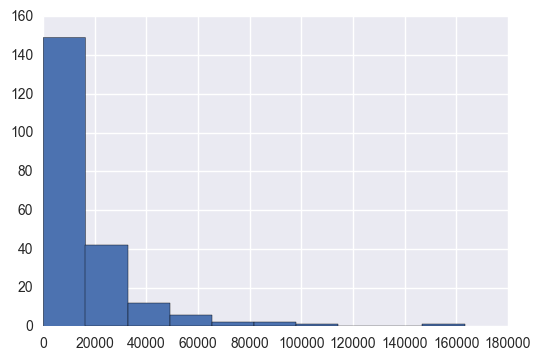

In [635]:

#categorizing each store number
store_names = pd.read_csv('../Resources/IA_Data_Stores.csv')
city_store = train.groupby(['Store Number','City'])['County'].nunique().to_frame()
city_store.reset_index(inplace = True)
total_citystore = pd.merge(city_store,store_names,on='Store Number')
store_type = []
liquor_list = []
grocery_list = []
other_list = []
for x in total_citystore['Store Name']:
    if ('liquor' or 'spirits' or 'wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('spirits') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('wine') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beverage') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('bottle') in x.lower():
        store_type.append('Liquor')  
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('vineyard') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('beer') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('cellar') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('holler') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('distribution') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('central city') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif ('distributing') in x.lower():
        store_type.append('Liquor')
        liquor_list.append(1)
        grocery_list.append(0)
        other_list.append(0)
    elif 'hy-vee' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'fareway' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'target'in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'wal-mart' in x.lower():
        store_type.append('Grocery') 
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'food' in x.lower():
        store_type.append('Grocery')
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'supermarket' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'dahl\'s' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)        
    elif 'sam\'s club' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)       
    elif 'econ-o-mart' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)          
    elif 'super valu' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'shop n save' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'grocery' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'pantry' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'costco' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'price chopper' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    elif 'save a lot' in x.lower():
        store_type.append('Grocery')           
        liquor_list.append(0)
        grocery_list.append(1)
        other_list.append(0)
    else:
        store_type.append('Other')
        liquor_list.append(0)
        grocery_list.append(0)
        other_list.append(1)
total_citystore['Store Type'] = pd.Series(store_type)
total_citystore['Liquor'] = pd.Series(liquor_list)
total_citystore['Grocery'] = pd.Series(grocery_list)
total_citystore['Other'] = pd.Series(other_list)

total_citystore_merge = total_citystore.iloc[:,[0,1,3,4,5,6,7]]
store_type_sales = pd.merge(total_citystore,sales_per_store)
#liquor store type sales histogram
store_type_sales[store_type_sales['Store Type'] == 'Liquor']['Sale (Dollars)'].hist()
#groupby store type and evaluate metrics for each store type for the state of iowa
#liquor stores have higher mean liquor sales than groceries and convenience stores
#convenience stores might be the go to place for small rural towns
store_type_sales.groupby('Store Type')['Sale (Dollars)'].agg({sum,len,np.mean})

#what about cities where there are at least one liquor store or grocery stores
city_type_sales = store_type_sales.groupby('City')[['Liquor','Grocery','Other','Sale (Dollars)']].sum()
#the average sales per city where there is at least 1 grocery or 1 liquor store
mean_city_grocery_liquor = city_type_sales[(city_type_sales['Liquor']>0) |(city_type_sales['Grocery']>0)]['Sale (Dollars)'].mean()
print 'The Average Sales/City where there is at least 1 Liquor or Grocery Store: $',mean_city_grocery_liquor.round(2)
city_type_sales.sort_values('Sale (Dollars)',ascending = False)

## Record your findings

The skewed variables are:

Avg_items_store is the average items per store for the county, it is a proxy for size of store

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.